In [1]:
#Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
#how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
#Forecasting.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [37]:
df = pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx")
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df = df.set_index('Month')
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [9]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [3]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

<AxesSubplot:>

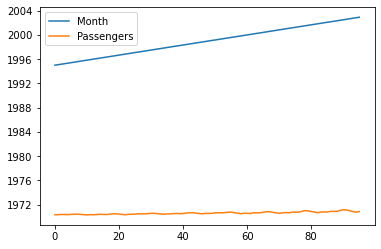

In [10]:
df.plot()

<AxesSubplot:>

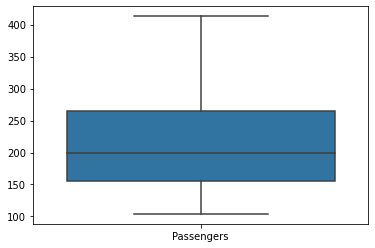

In [11]:
import seaborn as  sns
sns.boxplot(data =df)


array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

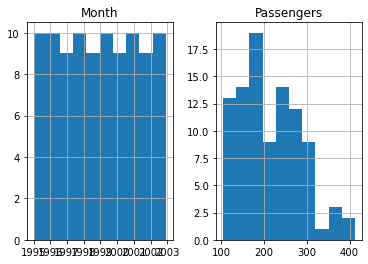

In [12]:
df.hist()

In [14]:
np.array(df["Passengers"])


array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


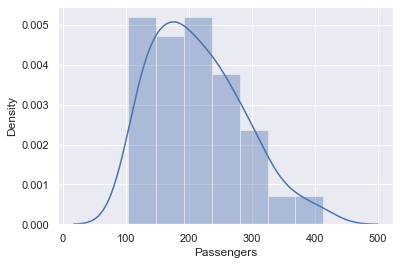

In [15]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(df['Passengers'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

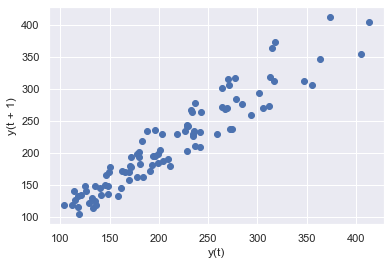

In [16]:
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])

In [17]:
#Data Preprocessing


In [18]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [19]:
len(df)

96

In [24]:
df['Month'] = 0
for i in range(42):
    p=df['Month'][i]
    df['Month'][i]

In [25]:
df

,Month,Passengers,quarter
0,0,112,0
1,0,118,0
2,0,132,0
3,0,129,0
4,0,121,0
...,...,...,...
91,0,405,0
92,0,355,0
93,0,306,0
94,0,271,0


In [28]:
df['Month'].value_counts()

0    96
Name: Month, dtype: int64

In [29]:
df_dummies=pd.DataFrame(pd.get_dummies(df['Month']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)
df.head()

,Month,Passengers,quarter
0,0,112,0
1,0,118,0
2,0,132,0
3,0,129,0
4,0,121,0


In [30]:
cc

,Month,Passengers,quarter,Q1,Q2,Q3,Q4
0,0,112,0,NaN,NaN,NaN,NaN
1,0,118,0,NaN,NaN,NaN,NaN
2,0,132,0,NaN,NaN,NaN,NaN
3,0,129,0,NaN,NaN,NaN,NaN
4,0,121,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
91,0,405,0,NaN,NaN,NaN,NaN
92,0,355,0,NaN,NaN,NaN,NaN
93,0,306,0,NaN,NaN,NaN,NaN
94,0,271,0,NaN,NaN,NaN,NaN


In [38]:
#Time Series Analysis
#Plot time series data

<AxesSubplot:xlabel='Month'>

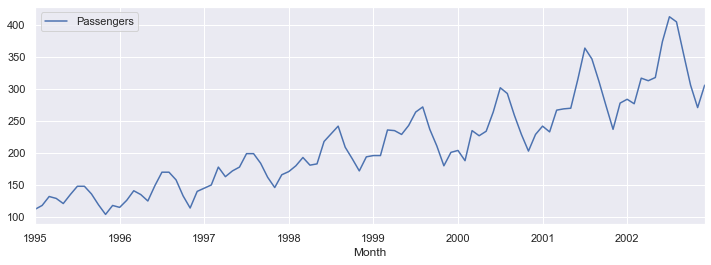

In [40]:
df.plot(figsize=(12,4))

In [41]:
#Handling missing values
#Mean inputation

<AxesSubplot:xlabel='Month'>

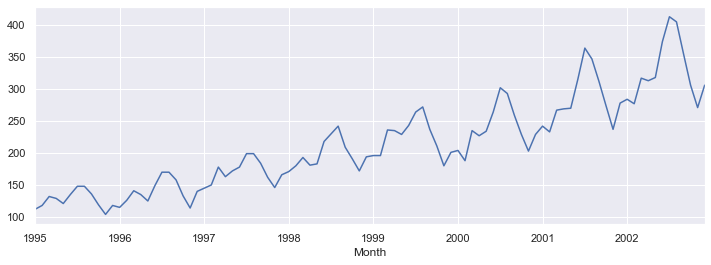

In [42]:
df = df.assign(Passengers_Mean_imputation = df['Passengers'].fillna(df['Passengers'].mean()))
df['Passengers_Mean_imputation'].plot(figsize=(12,4))

In [43]:
#Linear interpolation

In [44]:
df = df.assign(Passengers_Linear_Interpolation = df['Passengers'].interpolate(method='linear'))
df.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1995-01-01,112,112,112
1995-02-01,118,118,118
1995-03-01,132,132,132
1995-04-01,129,129,129
1995-05-01,121,121,121


<AxesSubplot:xlabel='Month'>

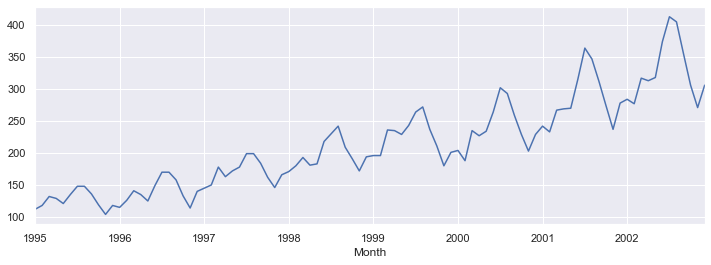

In [45]:
df['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

In [47]:
#Outlier detection
#Box plot and interquartile range

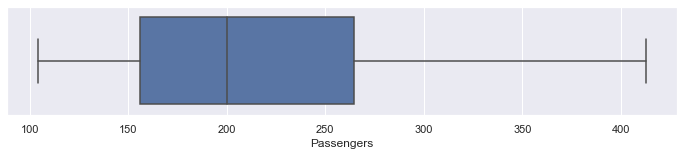

In [48]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)

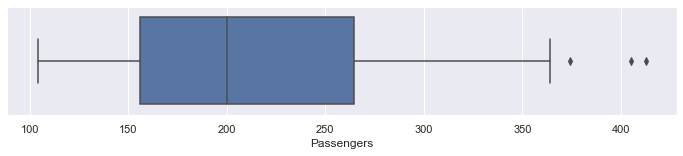

In [49]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1)


In [50]:
#Histogram plot

<AxesSubplot:>

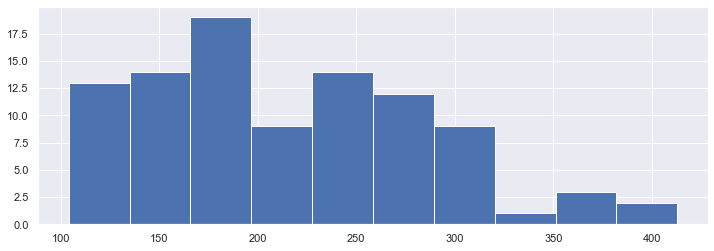

In [51]:
df['Passengers'].hist(figsize=(12,4))


In [52]:
df.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1995-01-01,112,112,112
1995-02-01,118,118,118
1995-03-01,132,132,132
1995-04-01,129,129,129
1995-05-01,121,121,121


In [53]:
df = df.drop(['Passengers', 'Passengers_Mean_imputation'], axis=1)


In [54]:
df.rename(columns={'Passengers_Linear_Interpolation' : 'Passengers'}, inplace=True)

df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [55]:
#Time series decomposition
#Additive seasonal decomposition

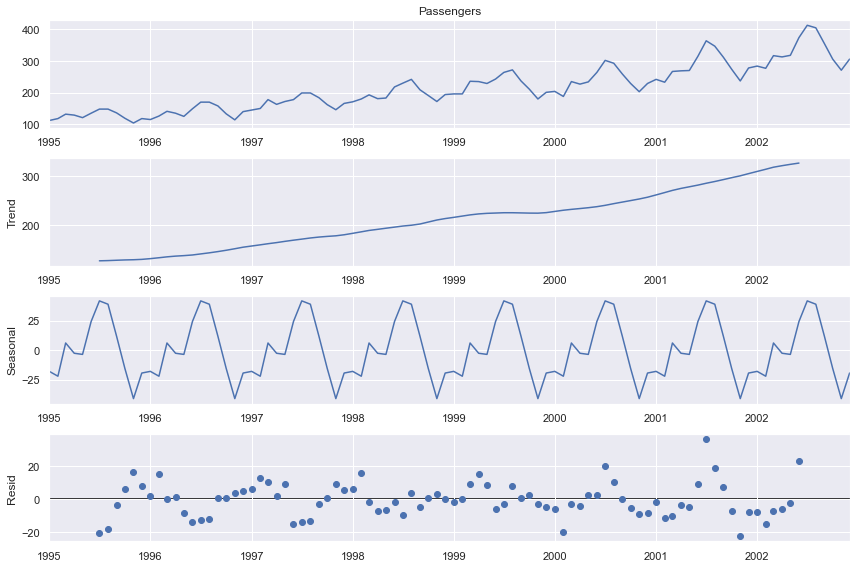

In [57]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

In [58]:
#Multiplicative seasonal decomposition

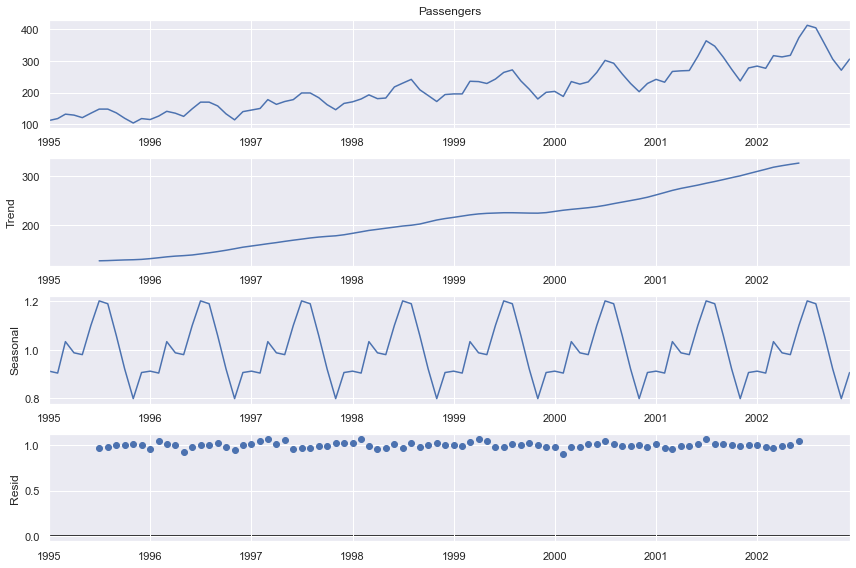

In [59]:
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [60]:
#Build and Evaluate time series forecast
#Splitting the data into train and test set

In [61]:
train_len = 120
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [62]:
train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [63]:
test.head()

,Passengers
Month,


In [64]:
#Naive method


In [65]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Passengers
Month,


In [67]:
#Plot train, test and forecast data


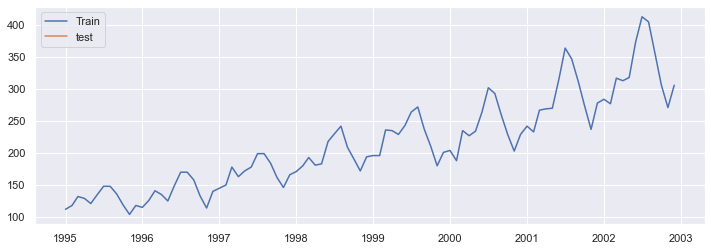

In [81]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')

plt.legend(loc='best')
plt.show()

In [71]:
#Simple average method


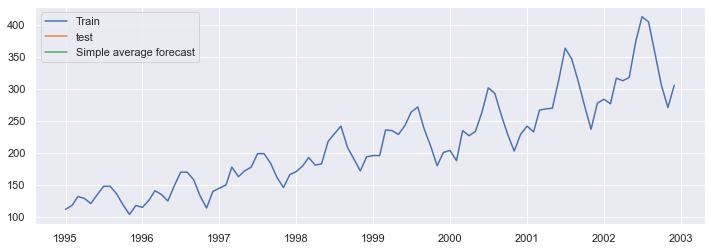

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

In [93]:
#Simple moving average method


In [89]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = df.copy()

In [90]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = df['Passengers'].rolling(ma_window).mean()

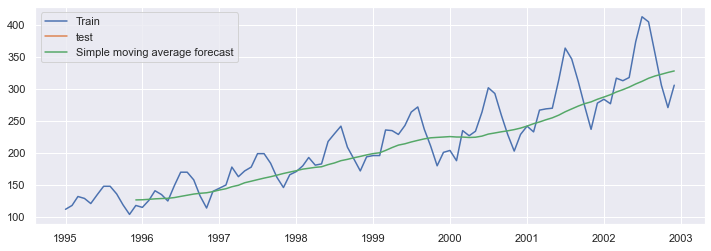

In [92]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

In [97]:
#Simple Exponential Smoothing


In [98]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [99]:
# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

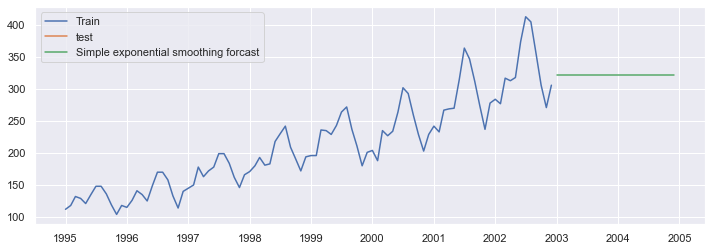

In [101]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


In [103]:
#Holt's Exponential Smoothing method

In [104]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [105]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# We are using additive trend because, from the time serices we can see that the data is linear
# In case of geometric trend we can use multiplicative trend
# seasonal=None Because we are not capturing seasonality in this model
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [106]:
# smoothing_level. It is the level parameter (alpha)
# smoothing_slope - It is the trend parameter (beta) 
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params


{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.4666666666666,
 'initial_trend': 2.0606060606060685,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

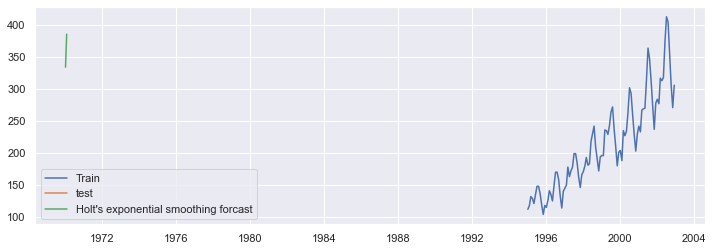

In [108]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [109]:
#Holt-Winters's Exponential Smoothing


In [110]:
y_hat_hwa = test.copy()
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# seasonal_periods = 12. Because the seasonality is on monthly basis. If the seasonality would have quarterly basis then seasonal_periods = 4 (4 quarters in an year)
# seasonal=additive for additive method
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')
# optimized=True . Here we are letting the system choose the optimal alpha, beta and gamma parameter.
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.254649925501571,
 'smoothing_trend': 2.543645281842299e-09,
 'smoothing_seasonal': 0.7453500675810899,
 'damping_trend': nan,
 'initial_level': 118.76876634027332,
 'initial_trend': 2.332846526461995,
 'initial_seasons': array([ -9.10328578,  -3.50557166,   8.96775554,   3.69507357,
         -5.07008289,   9.02879443,  21.24162791,  18.81622569,
          4.68594301, -14.11624487, -28.55672933, -11.9496582 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

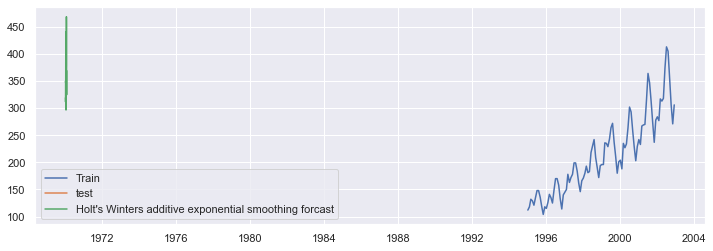

In [111]:
# Forecast for last 24 months
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [112]:
#Multiplicative method


In [113]:
y_hat_hwm = test.copy()
# seasonal=mul for multiplicative method
# trend='add' . We are not changing the trend. We are only chaning the seasonal from additive to multiplicative.
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.7412337757653918,
 'smoothing_trend': 1.710045341835665e-11,
 'smoothing_seasonal': 3.2533988320609825e-12,
 'damping_trend': nan,
 'initial_level': 104.85032051771273,
 'initial_trend': 1.9233908207691301,
 'initial_seasons': array([1.05993466, 1.03715827, 1.18885695, 1.14882013, 1.14127929,
        1.28752397, 1.42298956, 1.39260335, 1.22400702, 1.06334363,
        0.92424838, 1.04495077]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

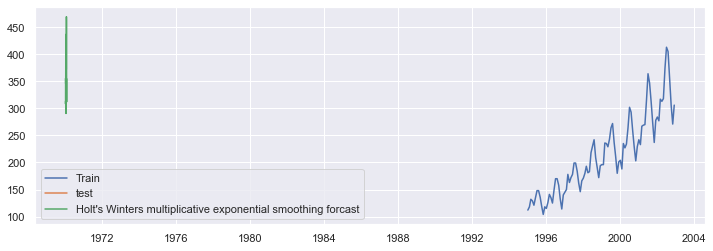

In [114]:
# Forecast for last 24 months
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [115]:
#Time Series Forecasting - II
#Auto Regressive Model (AR)
#Stationary vs Non-stationary Time Series
#1. Visually checking the Stationarity

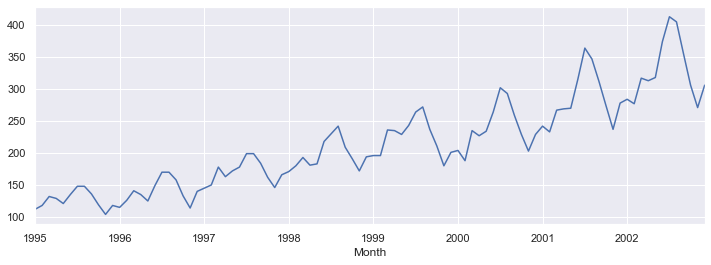

In [117]:
df['Passengers'].plot(figsize=(12,4))
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Passengers'])
adf_test

(1.3402479596467052,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [120]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 1.340248
p-value: 0.996825
Critical value @ 0.05: -2.90


In [121]:
#3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


In [123]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Passengers'])
kpss_test

(1.5395141992744144,
 0.01,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [124]:
print('KPSS stats: %f' % kpss_test[0])
print('p-value: %f' %kpss_test[1])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])

KPSS stats: 1.539514
p-value: 0.010000
Critical value @ 0.05: 0.46


In [125]:
#Converting Non-Stationary to Stationary Time Series
#Box Cox Transformation

In [128]:
from scipy.stats import boxcox
# Creating a new dataset with the boxcox
df_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
df_boxcox.head()

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
dtype: float64

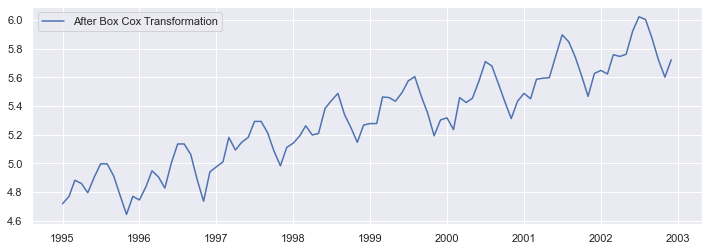

In [130]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

In [131]:
#Differencing


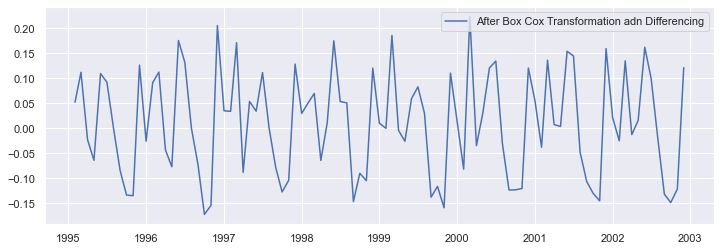

In [133]:
# data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)
# As the first record becomes null. Hence removing the frist observation.
df_boxcox_diff.dropna(inplace=True)
# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

In [134]:
#ADF Test


In [136]:
adf_test = adfuller(df_boxcox_diff)
adf_test

(-2.6708228902693554,
 0.0792246905663132,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331466)

In [137]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.670823
p-value: 0.079225
Critical value @ 0.05: -2.90


In [138]:
#Autocorrelation
#Autocorrelation function (ACF)

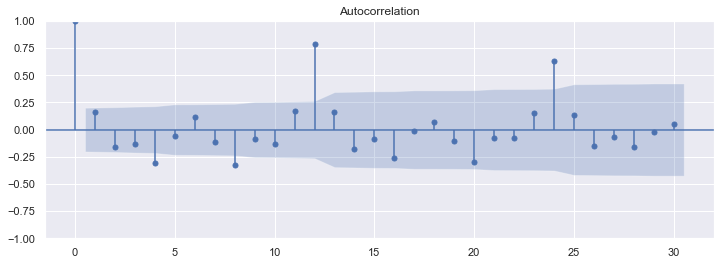

In [140]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [141]:
#Partial autocorrelation function (PACF)


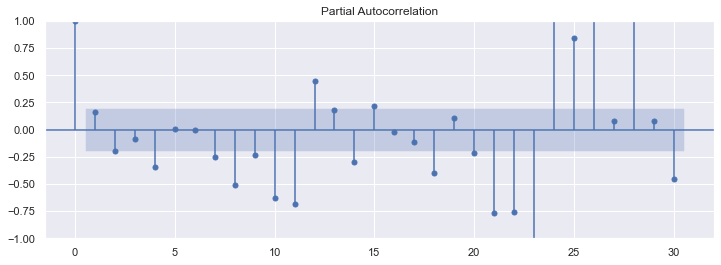

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(df_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()


In [143]:
#Splitting Stationary dataset into train and test set

In [145]:
# Splitting data_boxcox
train_data_boxcox = df_boxcox[:train_len]
test_data_boxcox = df_boxcox[train_len:]
# Splitting data_boxcox_diff

# Taking train_len-1 because we have deleted the forst observation
train_df_boxcox_diff = df_boxcox_diff[:train_len-1]
test_df_boxcox_diff = df_boxcox_diff[train_len-1:]

In [146]:
#Simple Auto Regressive Model (AR)


In [147]:
from statsmodels.tsa.arima_model import ARIMA


In [150]:
model_fit = model.fit()
model_fit.params

{'smoothing_level': 0.7412337757653918,
 'smoothing_trend': 1.710045341835665e-11,
 'smoothing_seasonal': 3.2533988320609825e-12,
 'damping_trend': nan,
 'initial_level': 104.85032051771273,
 'initial_trend': 1.9233908207691301,
 'initial_seasons': array([1.05993466, 1.03715827, 1.18885695, 1.14882013, 1.14127929,
        1.28752397, 1.42298956, 1.39260335, 1.22400702, 1.06334363,
        0.92424838, 1.04495077]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [151]:
#Forecast


In [153]:
y_hat_ar = df_boxcox_diff.copy()


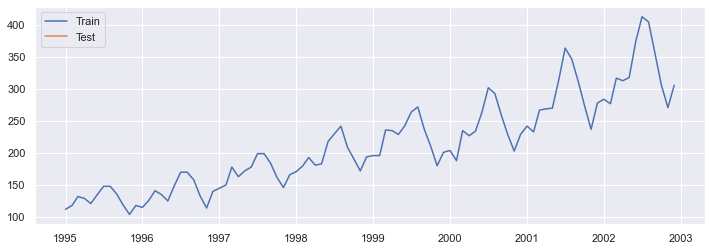

In [157]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.legend(loc='best')
plt.show()


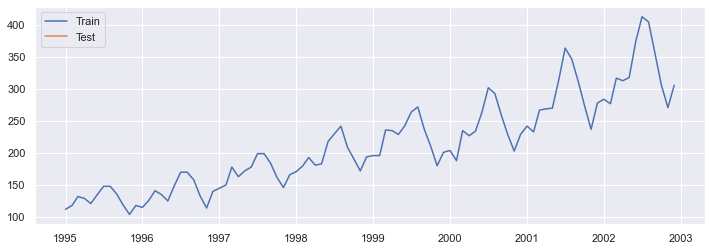

In [160]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.legend(loc='best')
plt.show()